# Boston Housing
   **By:** Sanket Sharma, ur.sanketsharma@gmail.com

### Problem Definition

### Objective:
To predict median value of owner occupied houses(MEDV).

### Dataset used: 
The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970, it can be downloaded from UCI machine learning repository 1http://lib.stat.cmu.edu/datasets/boston, its also available in sklearn.datasets.

### Features:
Feaures are defined as follows:

1. CRIM: per capita crime rate by town
2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS: proportion of non-retail business acres per town
4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. NOX: nitric oxides concentration (parts per 10 million)
6. RM: average number of rooms per dwelling
7. AGE: proportion of owner-occupied units built prior to 1940
8. DIS: weighted distances to five Boston employment centers
9. RAD: index of accessibility to radial highways
10. TAX: full-value property-tax rate per 10,000 US Dollars.
11. PTRATIO: pupil-teacher ratio by town
12. B: 1000(Bk − 0:63)2 where Bk is the proportion of blacks by town
13. LSTAT: Percentage lower statusus of the population
14. MEDV: Median value of owner-occupied homes in 1000s US Dollars

We can see that features have mixtures of units, it means we would have to standardise data.




### Load Dataset

In [1]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as skdt

In [2]:
# Load data from skdt
bh_data = skdt.load_boston()
bh_data

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3


The above data is in form of a dictionary, lets convert it into a dataframe

In [3]:
# Convert dict to dataframe

boston = pd.DataFrame(bh_data['data'], columns = bh_data.feature_names)

In [4]:
# convert 'Target' column to dataframe
target = pd.DataFrame(bh_data['target'], columns = ["MEDV"])

In [5]:
# lets concate target to boston
boston = pd.concat([boston, target], axis=1)


### Analyze Data

In [6]:
# lets check the shape of dataset
boston.shape

(506, 14)

it means we have 506 records and 14 features/columns

In [9]:
# lets have a look at top 5 rows
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [10]:
#lets have a look at bottom 5 rows
boston.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [7]:
#lets gather som info about data
boston.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(14)
memory usage: 55.5 KB


All features are of float type and each one have 506 non-null records , it means we won't have to drop any records , neither we need to encode any column

In [8]:
# lets have a look at statisctical attributes of data
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


We can see that the min and max values as well as the means vary a lot. 
We are likely going to get better results by rescaling the data in some way.


### Data Visualization

#### Unimodal visuals



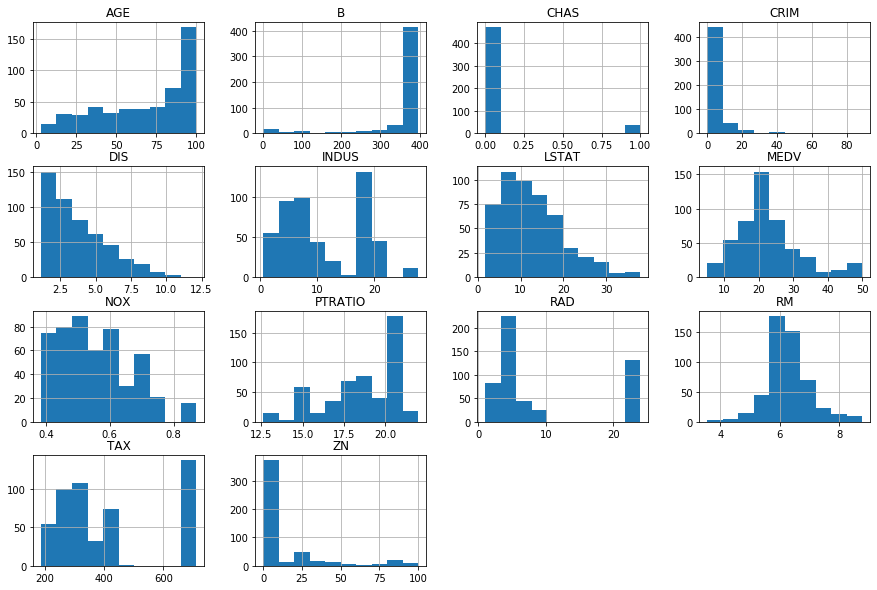

In [21]:
# Histogram
boston.hist(figsize=[15,10])
plt.show()

We can see that some attributes may have an exponential distribution, such as CRIM, ZN,
AGE and B. We can see that others may have a bimodal distribution such as RAD and TAX.

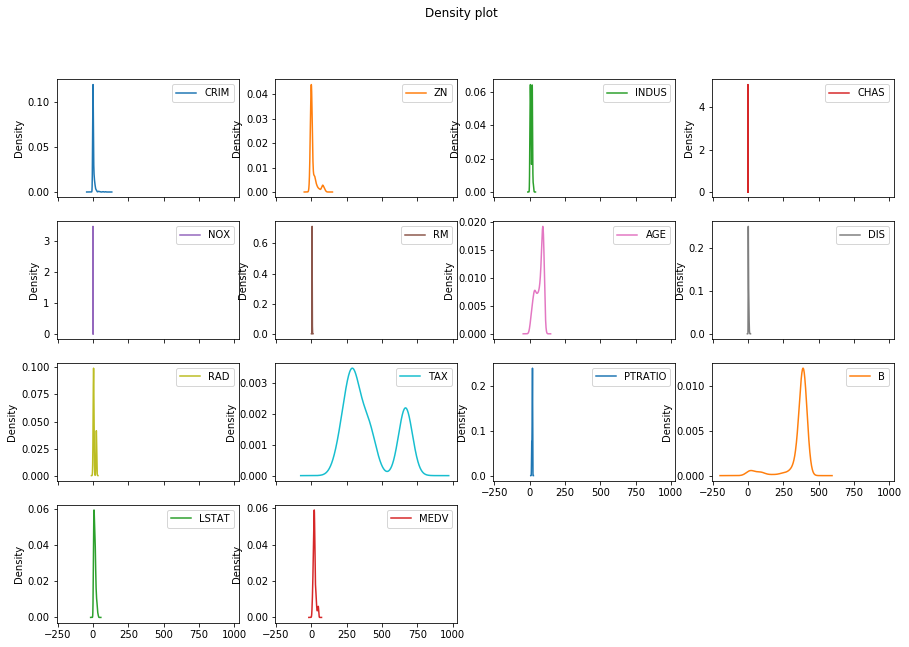

In [26]:
# Lets smoothen them out a bit using density plot
boston.plot(kind="density", figsize=[15,10], title="Density plot", subplots=True, layout=[4,4])
plt.show()

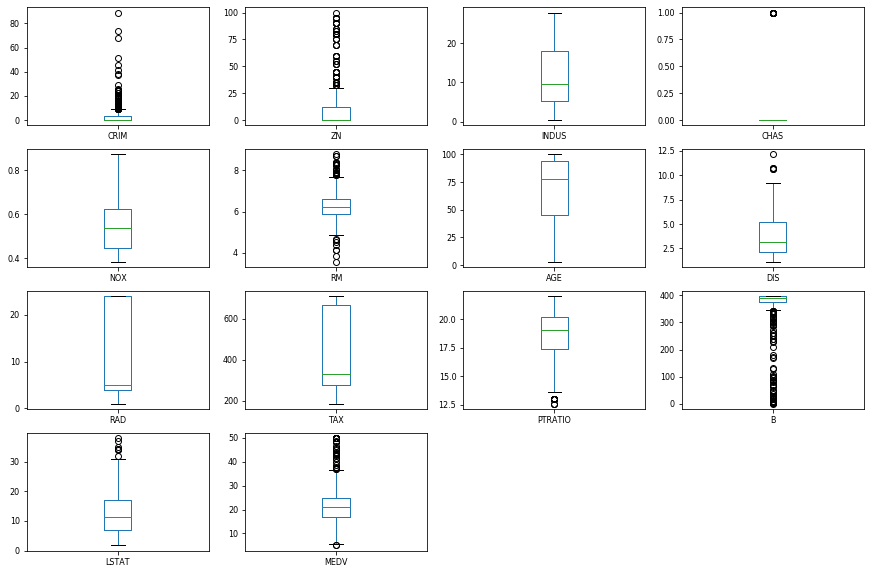

In [32]:
# box and whisker plat for each attribute

boston.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, fontsize=8, figsize=[15,10])
plt.show()

We can see that Columns **CRIM**, **ZN**, **RM**, **B**, **LSTAT**, **MEDV** have so many outliers. Let's fix the outliers by Quantile-based Flooring and Capping.


#### Outlier treatment

In [6]:
# Let's fix the outliers by Quantile-based Flooring and Capping.
    # let def a function for floring and capping
def flor_cap(df,col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low_val = Q1 - 1.5 * IQR
    high_val = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] <low_val, low_val,df[col])
    df[col] = np.where(df[col] >high_val, high_val,df[col])
    
# lets define columns list with so many outliers
out_lst = ["CRIM", "ZN", "RM", "B", "LSTAT", "MEDV"]

# lets apply flor_cap() to fix outliers
for col in out_lst:
    flor_cap(boston, col)    # boston is our dataset, col is column with outliers

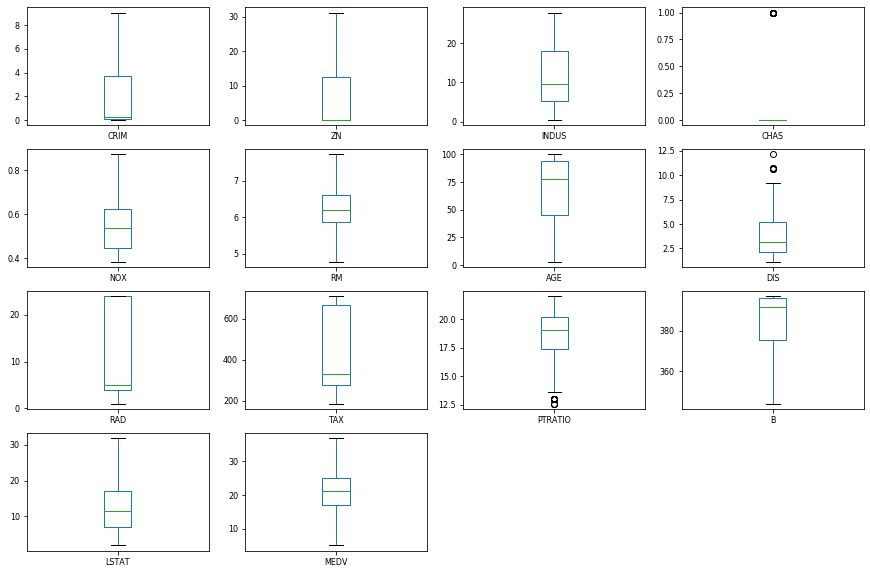

In [7]:
# lets check if we have fixed outliers successfully by ploting box and whisker plot again:
boston.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, fontsize=8, figsize=[15,10])
plt.show()


We can see that outliers have been fixed

#### Multimodal data visualization

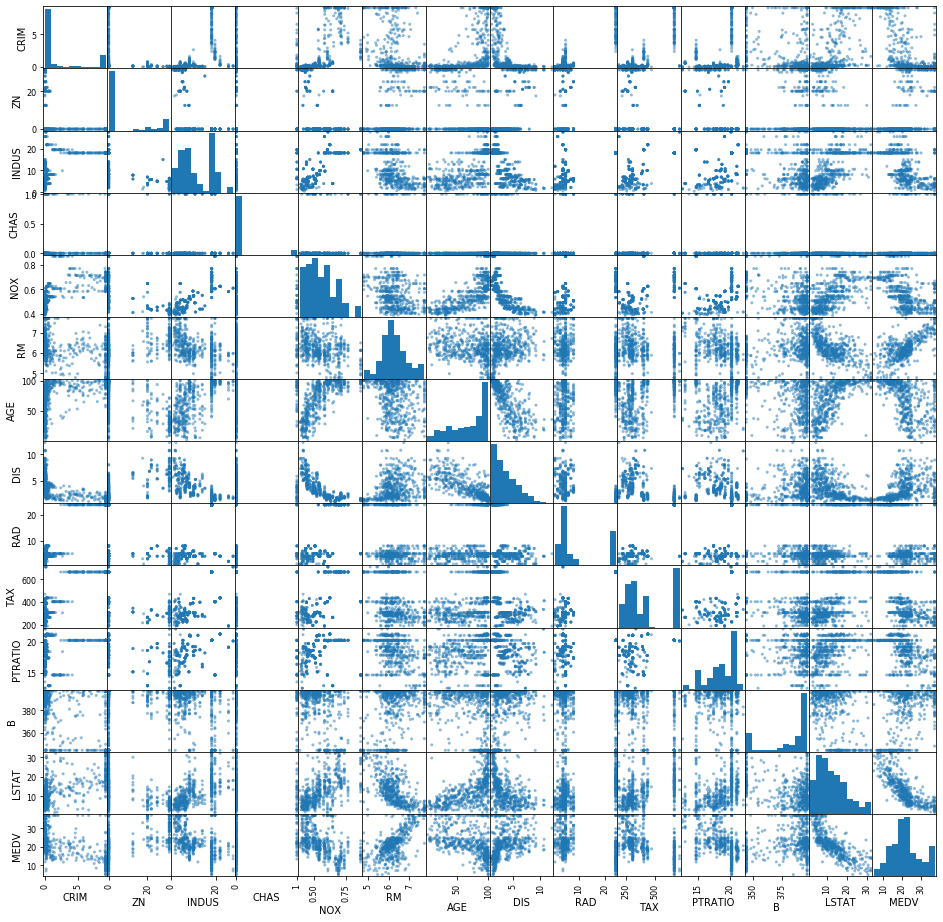

In [38]:
# Scatter matrix
pd.plotting.scatter_matrix(boston, figsize=[16,16])
plt.show()

We can see that some of the higher correlated attributes do show good structure in their
relationship. Not linear, but nice predictable curved relationships. lets plot a correlation heatmap for a better understanding

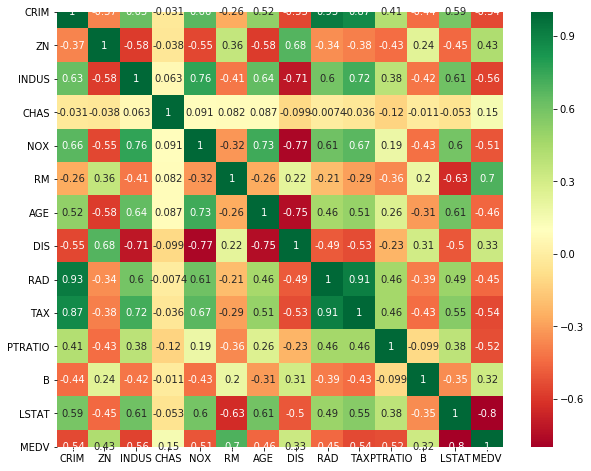

In [44]:
# Correlation matrix heatmap
fig = plt.figure(figsize = (10, 8))
sns.heatmap(boston.corr(), annot = True, cmap='RdYlGn')
plt.show()

The dark green color shows positive correlation whereas the dark red color shows negative
correlation. We can also see some dark green and dark red that suggest candidates for removal
to better improve accuracy of models later on

   **Summary of Ideas**
     - Feature selection and removing the most correlated attributes.
     - Normalizing the dataset to reduce the effect of differing scales.

#### Data Normalisation
Since features are having differing scales, it better to rescale data using normalization. 
Normalization refers to rescaling real valued numeric attributes into the range 0 and 1.

In [9]:
# Normalize the data
from sklearn import preprocessing
n_boston = preprocessing.normalize(boston)     # normalise boston
n_boston = pd.DataFrame(n_boston, columns = boston.columns) # copy normalised boston to dataframe
n_boston.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.000013,0.035955,0.004614,0.0,0.001075,0.013134,0.130238,0.008170,0.001998,0.591265,0.030562,0.792814,0.009948,0.047940
1,0.000058,0.000000,0.014961,0.0,0.000992,0.013588,0.166966,0.010511,0.004232,0.512112,0.037668,0.839907,0.019342,0.045709
2,0.000058,0.000000,0.015133,0.0,0.001004,0.015379,0.130778,0.010632,0.004281,0.517974,0.038099,0.840809,0.008626,0.074272
3,0.000071,0.000000,0.004772,0.0,0.001003,0.015319,0.100257,0.013270,0.006567,0.485964,0.040935,0.863856,0.006436,0.073114
4,0.000150,0.000000,0.004740,0.0,0.000996,0.015539,0.117842,0.013181,0.006523,0.482675,0.040658,0.862945,0.011589,0.078707



#### Train/Test split

In [23]:
# input variable
X = n_boston.drop(['MEDV'], axis=1)
y = n_boston['MEDV']

In [25]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

329    0.039526
371    0.048100
219    0.046858
403    0.010608
78     0.037966
Name: MEDV, dtype: float64


### Evaluating different Models
We dont know which calssification Model will perform best for this problem, So we will be evaluating below models.
- **Linear Algorithms:** Linear Regression (LR), Lasso Regression (LASSO).
- **Nonlinear Algorithms:** DecisionTreeRegressor, SupportVectorRegression (SVR) and k-Nearest Neighbors (KNN)
- **Ensamble Algorithms:** RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor

We will use 10-fold cross-validation. We will evaluate algorithms using the Mean Squared Error (MSE) metric. MSE will give a gross idea of how wrong all predictions are (0 is perfect).

In [48]:
# lets import necessary libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor

In [42]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'neg_mean_squared_error'

In [69]:
# Spot-Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('Decision_Tree', DecisionTreeRegressor()))
models.append(('SVR', SVR(gamma = "auto")))
models.append(("Randaomforest", RandomForestRegressor(n_estimators=10)))
models.append(('GBR', GradientBoostingRegressor()))
models.append(('ExtraTrees', ExtraTreesRegressor(n_estimators=10)))
models.append(('AdaBoost', AdaBoostRegressor()))

In [79]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


LR: -0.000033 (0.000008)
LASSO: -0.000358 (0.000065)
KNN: -0.000071 (0.000018)
Decision_Tree: -0.000044 (0.000010)
SVR: -0.000371 (0.000067)
Randaomforest: -0.000026 (0.000004)
GBR: -0.000020 (0.000006)
ExtraTrees: -0.000021 (0.000008)
AdaBoost: -0.000031 (0.000009)


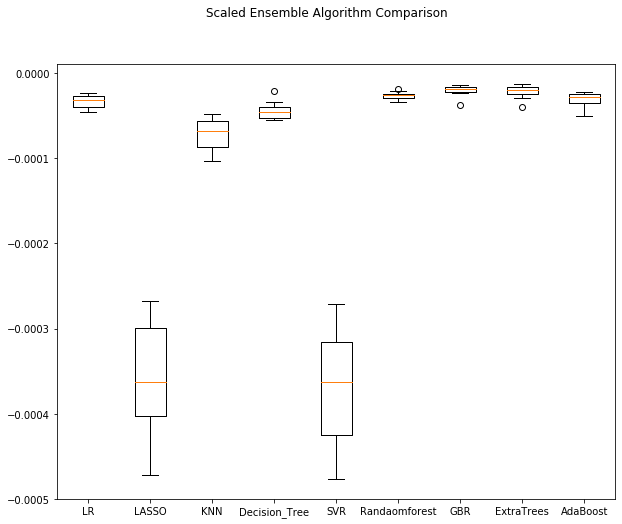

In [84]:
# Compare Algorithms
fig = plt.figure(figsize=[10,8])
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

We can see that **GradientBoostingRegressor(GBR)** performed best with respect to negative mean squared error. The default n_estimator= 100, we can futher Tune this enhance the model accuracy.

### Tune Ensemble(for GBR)
we will look at tuning the number of stages for gradient boosting. Below we define a parameter grid n estimators values from 50 to 400 in increments of 50. Each setting is evaluated using 10-fold cross-validation.

In [90]:
# Tune scaled GBM

param_grid = dict(n_estimators=np.array([10,50,100,150,200,250,300,350,400]))
model = GradientBoostingRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold,
iid=True)
grid_result = grid.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.000020 using {'n_estimators': 200}
-0.000078 (0.000013) with: {'n_estimators': 10}
-0.000022 (0.000007) with: {'n_estimators': 50}
-0.000020 (0.000007) with: {'n_estimators': 100}
-0.000020 (0.000006) with: {'n_estimators': 150}
-0.000020 (0.000006) with: {'n_estimators': 200}
-0.000020 (0.000006) with: {'n_estimators': 250}
-0.000020 (0.000007) with: {'n_estimators': 300}
-0.000020 (0.000007) with: {'n_estimators': 350}
-0.000020 (0.000007) with: {'n_estimators': 400}


So we can finalise GradientBoostingRegressor(n_estimator=200)

### Finalize Model

In [93]:
# train the model
model = GradientBoostingRegressor(random_state=seed, n_estimators=200)
model.fit(X_train, y_train)

# make predictions
prediction = model.predict(X_test)

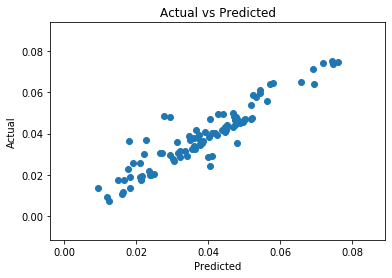

In [103]:
# lets plot scatterplot of actual vs predictions
plt.scatter(prediction, y_test)
plt.title("Actual vs Predicted")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [111]:
from sklearn import metrics
print("Mean Absolute Error(MAE) : ", metrics.mean_absolute_error(y_test, prediction))
print("Mean Squared error(MSE) : ", metrics.mean_squared_error(y_test, prediction))
print("Root Mean Squared Error(RMSE) : ", np.sqrt(metrics.mean_squared_error(y_test, prediction)))
print("R2 Score", metrics.r2_score(y_test, prediction))

Mean Absolute Error(MAE) :  0.00409902823929796
Mean Squared error(MSE) :  3.1730275710949415e-05
Root Mean Squared Error(RMSE) :  0.005632963315249747
R2 Score 0.8657175577717454
